In [91]:
import pandas as pd

In [92]:
df = pd.read_csv("loan_data.csv")

In [93]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [95]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [96]:
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [97]:
df.duplicated().sum()

0

In [98]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

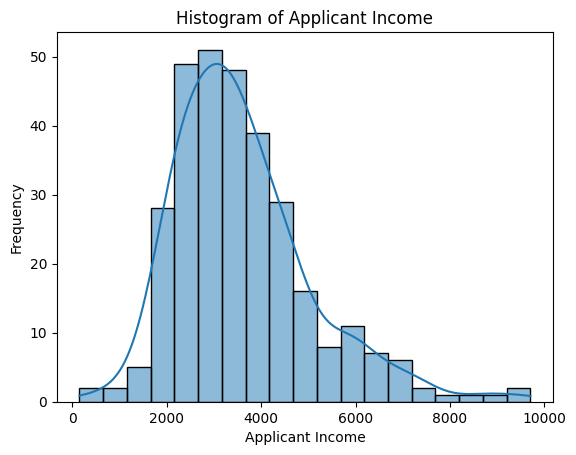

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Histogram of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

In [100]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

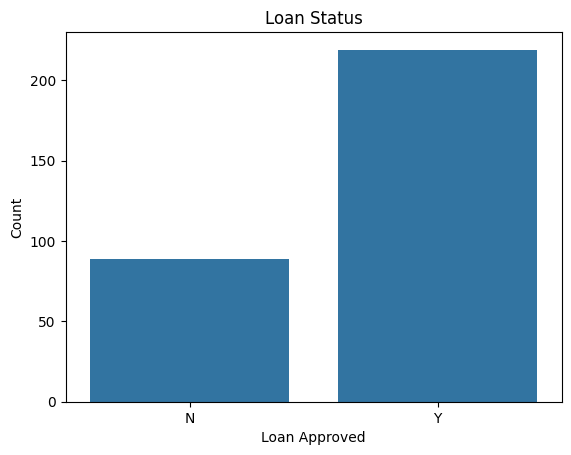

In [101]:
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Status")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

Will need to oversample due to class imbalance in sample.

In [102]:
avg_loan_amount_by_education = df.groupby("Education")["LoanAmount"].mean().reset_index()
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


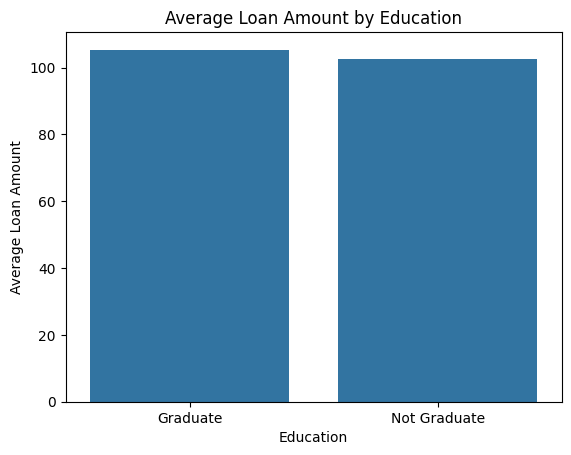

In [103]:
sns.barplot(x="Education", y="LoanAmount", data=avg_loan_amount_by_education)
plt.title("Average Loan Amount by Education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()

In [104]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

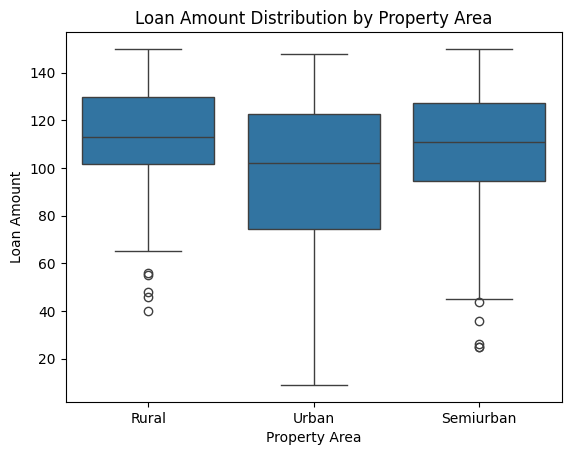

In [105]:
sns.boxplot(x="Property_Area", y="LoanAmount", data=df)
plt.title("Loan Amount Distribution by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

In [106]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

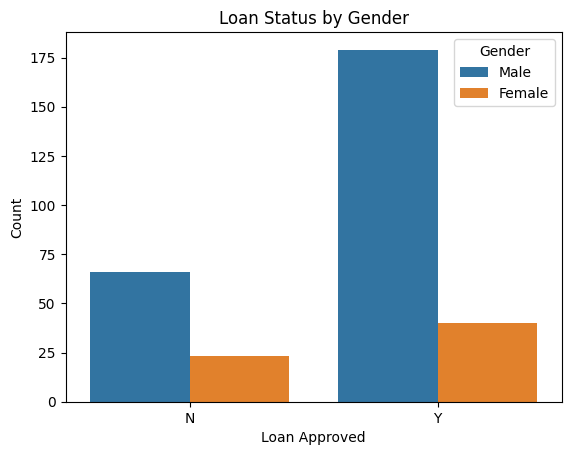

In [107]:
sns.countplot(x="Loan_Status", hue="Gender", data=df)
plt.title("Loan Status by Gender")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

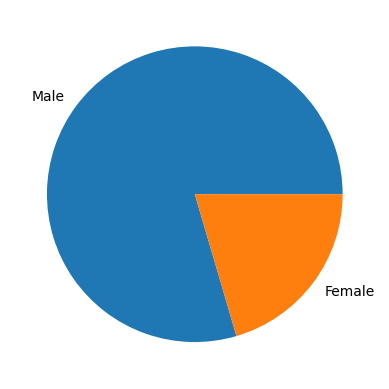

In [108]:
df["Gender"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.show()

In [109]:
loan_status_by_married = df.groupby("Married")["Loan_Status"].value_counts().unstack()

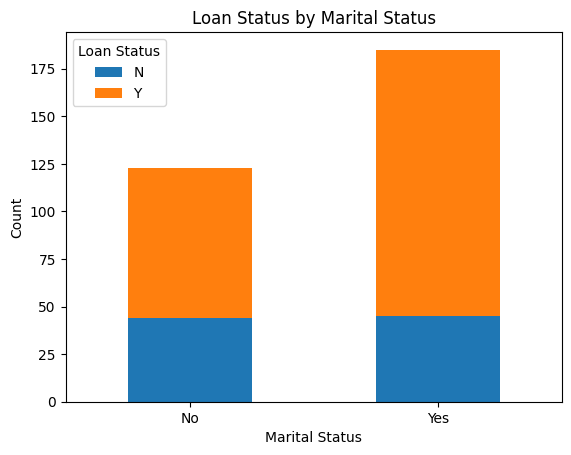

In [110]:
loan_status_by_married.plot(kind="bar", stacked=True)
plt.title("Loan Status by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.xticks(rotation=0)
plt.show()

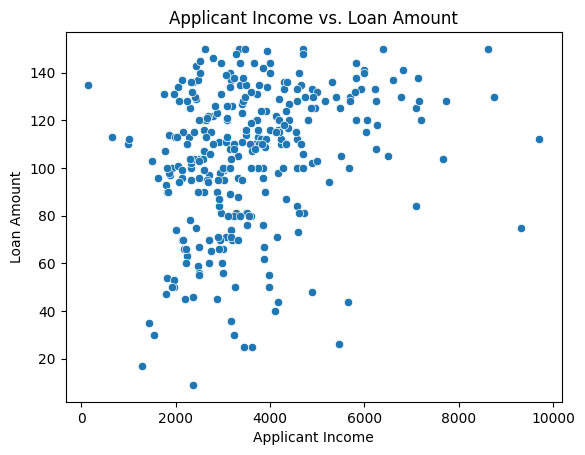

In [111]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df)
plt.title("Applicant Income vs. Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [112]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

In [113]:
numeric_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [114]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


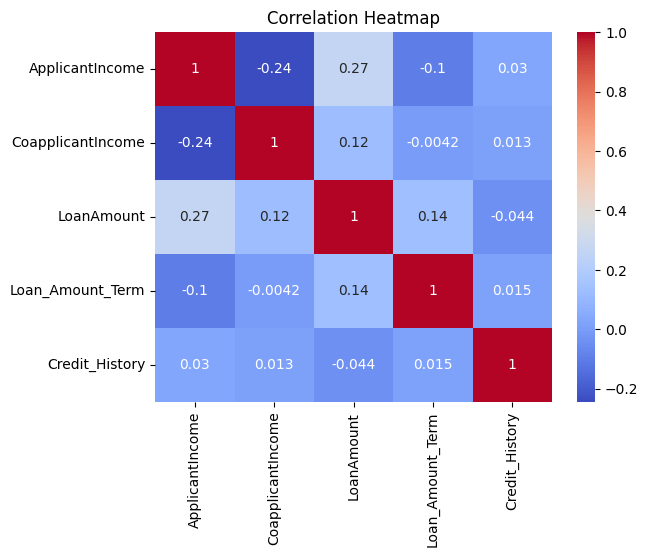

In [115]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [116]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [117]:
avg_loan_term_by_employed = df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()
avg_loan_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


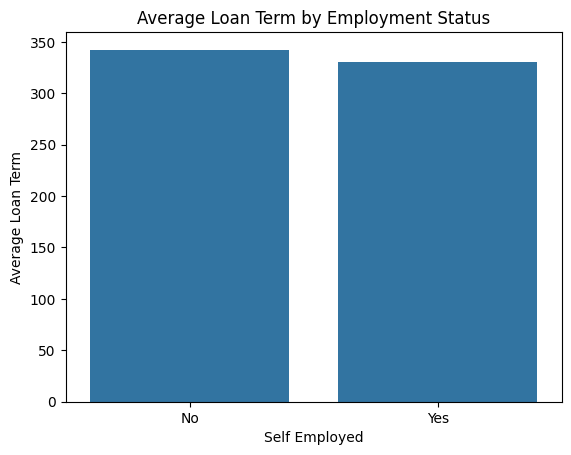

In [118]:
sns.barplot(x="Self_Employed", y="Loan_Amount_Term", data=avg_loan_term_by_employed)
plt.title("Average Loan Term by Employment Status")
plt.xlabel("Self Employed")
plt.ylabel("Average Loan Term")
plt.show()

In [119]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [120]:
X =  df[["ApplicantIncome", "Married", "CoapplicantIncome", "Education", "LoanAmount", "Credit_History", "Property_Area"]]
X
# 3500, 0, 3000, 1, 100, 1, 2

,ApplicantIncome,Married,CoapplicantIncome,Education,LoanAmount,Credit_History,Property_Area
0,4583,Yes,1508.0,Graduate,128.0,1.0,Rural
1,3000,Yes,0.0,Graduate,66.0,1.0,Urban
2,2583,Yes,2358.0,Not Graduate,120.0,1.0,Urban
3,6000,No,0.0,Graduate,141.0,1.0,Urban
4,2333,Yes,1516.0,Not Graduate,95.0,1.0,Urban
...,...,...,...,...,...,...,...
376,5703,Yes,0.0,Graduate,128.0,1.0,Urban
377,3232,Yes,1950.0,Graduate,108.0,1.0,Rural
378,2900,No,0.0,Graduate,71.0,1.0,Rural
379,4106,Yes,0.0,Graduate,40.0,1.0,Rural


In [121]:
y = df[["Loan_Status"]]
y

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
...,...
376,Y
377,Y
378,Y
379,Y


In [122]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [123]:
y["Loan_Status"] = label_encoder.fit_transform(y["Loan_Status"])
y

/var/folders/03/zvq_lt1s2gd346g4982350840000gn/T/ipykernel_33282/2953384967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Loan_Status"] = label_encoder.fit_transform(y["Loan_Status"])


,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [124]:
label_encoder.classes_
# N = 0, Y = 1

array(['N', 'Y'], dtype=object)

In [125]:
X["Married"] = label_encoder.fit_transform(X["Married"])
X

/var/folders/03/zvq_lt1s2gd346g4982350840000gn/T/ipykernel_33282/867553577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"] = label_encoder.fit_transform(X["Married"])


,ApplicantIncome,Married,CoapplicantIncome,Education,LoanAmount,Credit_History,Property_Area
0,4583,1,1508.0,Graduate,128.0,1.0,Rural
1,3000,1,0.0,Graduate,66.0,1.0,Urban
2,2583,1,2358.0,Not Graduate,120.0,1.0,Urban
3,6000,0,0.0,Graduate,141.0,1.0,Urban
4,2333,1,1516.0,Not Graduate,95.0,1.0,Urban
...,...,...,...,...,...,...,...
376,5703,1,0.0,Graduate,128.0,1.0,Urban
377,3232,1,1950.0,Graduate,108.0,1.0,Rural
378,2900,0,0.0,Graduate,71.0,1.0,Rural
379,4106,1,0.0,Graduate,40.0,1.0,Rural


In [126]:
label_encoder.classes_
# No = 0, Yes = 1

array(['No', 'Yes'], dtype=object)

In [127]:
X["Education"] = label_encoder.fit_transform(X["Education"])
X

/var/folders/03/zvq_lt1s2gd346g4982350840000gn/T/ipykernel_33282/606866688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"] = label_encoder.fit_transform(X["Education"])


,ApplicantIncome,Married,CoapplicantIncome,Education,LoanAmount,Credit_History,Property_Area
0,4583,1,1508.0,0,128.0,1.0,Rural
1,3000,1,0.0,0,66.0,1.0,Urban
2,2583,1,2358.0,1,120.0,1.0,Urban
3,6000,0,0.0,0,141.0,1.0,Urban
4,2333,1,1516.0,1,95.0,1.0,Urban
...,...,...,...,...,...,...,...
376,5703,1,0.0,0,128.0,1.0,Urban
377,3232,1,1950.0,0,108.0,1.0,Rural
378,2900,0,0.0,0,71.0,1.0,Rural
379,4106,1,0.0,0,40.0,1.0,Rural


In [128]:
label_encoder.classes_
# Graduate = 0, Not Graduate = 1

array(['Graduate', 'Not Graduate'], dtype=object)

In [129]:
X["Property_Area"] = label_encoder.fit_transform(X["Property_Area"])
X

/var/folders/03/zvq_lt1s2gd346g4982350840000gn/T/ipykernel_33282/1574748381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Property_Area"] = label_encoder.fit_transform(X["Property_Area"])


,ApplicantIncome,Married,CoapplicantIncome,Education,LoanAmount,Credit_History,Property_Area
0,4583,1,1508.0,0,128.0,1.0,0
1,3000,1,0.0,0,66.0,1.0,2
2,2583,1,2358.0,1,120.0,1.0,2
3,6000,0,0.0,0,141.0,1.0,2
4,2333,1,1516.0,1,95.0,1.0,2
...,...,...,...,...,...,...,...
376,5703,1,0.0,0,128.0,1.0,2
377,3232,1,1950.0,0,108.0,1.0,0
378,2900,0,0.0,0,71.0,1.0,0
379,4106,1,0.0,0,40.0,1.0,0


In [130]:
label_encoder.classes_
# Rural = 0, Semiurban = 1, Urban = 2

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [132]:
X = scaler.fit_transform(X)
X

array([[ 0.67389339,  0.81539246,  0.09121075, ...,  0.79689813,
         0.41364557, -1.34675568],
       [-0.41036528,  0.81539246, -0.50794721, ..., -1.31665281,
         0.41364557,  1.23767266],
       [-0.6959849 ,  0.81539246,  0.42893241, ...,  0.52418188,
         0.41364557,  1.23767266],
       ...,
       [-0.47885919, -1.22640329, -0.50794721, ..., -1.14620515,
         0.41364557, -1.34675568],
       [ 0.34717742,  0.81539246, -0.50794721, ..., -2.20298062,
         0.41364557, -1.34675568],
       [ 0.67389339, -1.22640329, -0.50794721, ...,  0.96734579,
        -2.41752858, -0.05454151]])

In [133]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def modelperformance(predictions):
    print("Accuracy Score: {}".format(accuracy_score(y_test, predictions)))
    print("Classification Report: \n", classification_report(y_test, predictions))



In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

/Users/gavinbrumfield/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [139]:
log_predictions = log_model.predict(X_test)
modelperformance(log_predictions)

Accuracy Score: 0.8709677419354839
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.90      0.95      0.92        74

    accuracy                           0.87        93
   macro avg       0.82      0.76      0.78        93
weighted avg       0.86      0.87      0.87        93



In [140]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors": [3,5,7,9,11,13,15,17,19,21],
              "weights": ["uniform","distance"]}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)
gridkn.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']})

In [ ]:
gridkn.best_params_

{'n_neighbors': 13, 'weights': 'distance'}

In [ ]:
kn_predictions = gridkn.predict(X_test)
modelperformance(kn_predictions)

Accuracy Score: 0.8494623655913979
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.89      0.92      0.91        74

    accuracy                           0.85        93
   macro avg       0.77      0.75      0.76        93
weighted avg       0.84      0.85      0.85        93



In [158]:
from sklearn.svm import SVC
param_grid_svc = {"C": [0.01,0.1,0.5,1,5,10,50,100],
                  "kernel": ["linear", "rbf", "poly"]}

In [144]:
gridsvc = GridSearchCV(SVC(), param_grid_svc)
gridsvc.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [145]:
gridsvc.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [146]:
svc_predictions = gridsvc.predict(X_test)
modelperformance(svc_predictions)

Accuracy Score: 0.8709677419354839
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.90      0.95      0.92        74

    accuracy                           0.87        93
   macro avg       0.82      0.76      0.78        93
weighted avg       0.86      0.87      0.87        93



## Oversampling

### ROS

In [179]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

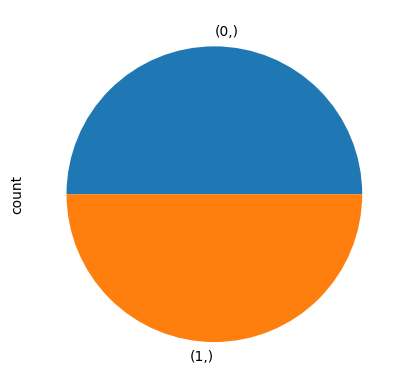

In [180]:
y_resampled.value_counts().plot(kind="pie")

In [ ]:
# Over Sampled Logisitc
log_model_os = LogisticRegression()
log_model_os.fit(X_resampled, y_resampled)
# Over Sampled Logistic Predictions and Performance
log_ros_predictions = log_model_os.predict(X_test)
# Oversampled KNN
gridknos = GridSearchCV(KNeighborsClassifier(), param_grid)
gridknos.fit(X_resampled, y_resampled.values.ravel())
# Oversampled KNN Predictions and Performance
kn_ros_predictions = gridknos.predict(X_test)
# Oversampled SVC
gridsvcos = GridSearchCV(SVC(), param_grid_svc)
gridsvcos.fit(X_resampled, y_resampled.values.ravel())
# Oversampled SVC Predictions and Performance
svc_ros_predictions = gridsvcos.predict(X_test)

/Users/gavinbrumfield/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### SMOTE

In [189]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

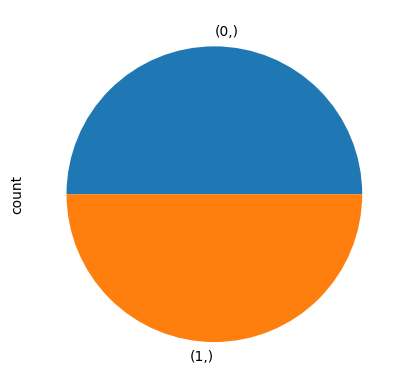

In [190]:
y_resampled.value_counts().plot(kind="pie")

In [ ]:
# Over Sampled Logisitc
log_model_os = LogisticRegression()
log_model_os.fit(X_resampled, y_resampled)
# Over Sampled Logistic Predictions and Performance
log_smote_predictions = log_model_os.predict(X_test)
# Oversampled KNN
gridknos = GridSearchCV(KNeighborsClassifier(), param_grid)
gridknos.fit(X_resampled, y_resampled.values.ravel())
# Oversampled KNN Predictions and Performance
kn_smote_predictions = gridknos.predict(X_test)
# Oversampled SVC
gridsvcos = GridSearchCV(SVC(), param_grid_svc)
gridsvcos.fit(X_resampled, y_resampled.values.ravel())
# Oversampled SVC Predictions and Performance
svc_smote_predictions = gridsvcos.predict(X_test)

/Users/gavinbrumfield/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### ADASYN

In [199]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

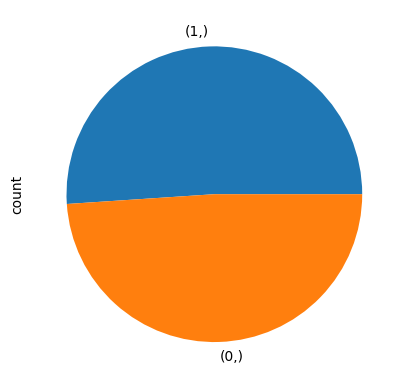

In [ ]:
y_resampled.value_counts().plot(kind="pie")

In [203]:
# Over Sampled Logisitc
log_model_os = LogisticRegression()
log_model_os.fit(X_resampled, y_resampled)
# Over Sampled Logistic Predictions and Performance
log_adasyn_predictions = log_model_os.predict(X_test)
# Oversampled KNN
gridknos = GridSearchCV(KNeighborsClassifier(), param_grid)
gridknos.fit(X_resampled, y_resampled.values.ravel())
# Oversampled KNN Predictions and Performance
kn_adasyn_predictions = gridknos.predict(X_test)
# Oversampled SVC
gridsvcos = GridSearchCV(SVC(), param_grid_svc)
gridsvcos.fit(X_resampled, y_resampled.values.ravel())
# Oversampled SVC Predictions and Performance
svc_adasyn_predictions = gridsvcos.predict(X_test)

/Users/gavinbrumfield/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [206]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

def compare_models():
    models = {
        "Logistic Regression": {
            "Original": log_predictions,
            "ROS": log_ros_predictions,
            "SMOTE": log_smote_predictions,
            "ADASYN": log_adasyn_predictions
        },
        "KNN": {
            "Original": kn_predictions,
            "ROS": kn_ros_predictions,
            "SMOTE": kn_smote_predictions,
            "ADASYN": kn_adasyn_predictions
        },
        "SVC": {
            "Original": svc_predictions,
            "ROS": svc_ros_predictions,
            "SMOTE": svc_smote_predictions,
            "ADASYN": svc_adasyn_predictions
        }
    }

    best_model = None
    best_sampling = None
    best_scores = {
        'class_metrics': {},
        'overall': {'accuracy': 0}
    }

    for model_name, sampling_methods in models.items():
        for sampling_method, predictions in sampling_methods.items():
            # Get per-class precision and recall
            precision = precision_score(y_test, predictions, average=None)
            recall = recall_score(y_test, predictions, average=None)
            accuracy = accuracy_score(y_test, predictions)
            
            # Print detailed results
            print(f"\nModel: {model_name}, Sampling: {sampling_method}")
            print("Classification Report:")
            print(classification_report(y_test, predictions))
            
            # Check if this is the best model so far
            # We'll use the minimum recall across all classes as our primary metric
            min_recall = min(recall)
            
            if best_model is None or min_recall > min(best_scores['class_metrics'].get('recall', [0])):
                best_scores['class_metrics'] = {
                    'precision': precision,
                    'recall': recall
                }
                best_scores['overall']['accuracy'] = accuracy
                best_model = model_name
                best_sampling = sampling_method

    print("\n=== Best Model Results ===")
    print(f"Model: {best_model}")
    print(f"Sampling Method: {best_sampling}")
    print("\nPer-class metrics:")
    for class_idx in range(len(best_scores['class_metrics']['precision'])):
        print(f"\nClass {class_idx}:")
        print(f"Precision: {best_scores['class_metrics']['precision'][class_idx]:.4f}")
        print(f"Recall: {best_scores['class_metrics']['recall'][class_idx]:.4f}")
    print(f"\nOverall Accuracy: {best_scores['overall']['accuracy']:.4f}")

compare_models()


Model: Logistic Regression, Sampling: Original
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.90      0.95      0.92        74

    accuracy                           0.87        93
   macro avg       0.82      0.76      0.78        93
weighted avg       0.86      0.87      0.87        93


Model: Logistic Regression, Sampling: ROS
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        19
           1       0.90      0.86      0.88        74

    accuracy                           0.82        93
   macro avg       0.72      0.75      0.73        93
weighted avg       0.83      0.82      0.82        93


Model: Logistic Regression, Sampling: SMOTE
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.58      0.55        19
           1       0.89      0.8

In [207]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
gridknos = GridSearchCV(KNeighborsClassifier(), param_grid)
gridknos.fit(X_resampled, y_resampled.values.ravel())
joblib.dump(gridknos, "model.pkl")

['model.pkl']